<a href="https://colab.research.google.com/github/VivaXiZzz/school_project/blob/main/%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D1%84%D0%B8%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D1%82%D0%B0%D0%B4%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Populating the interactive namespace from numpy and matplotlib


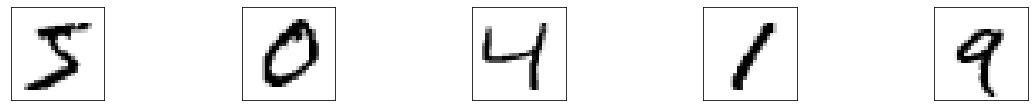

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 256)               200960    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_50 (Dense)            (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-t

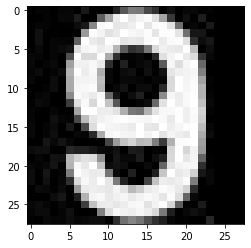

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt # визуализация
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.datasets import mnist # датасет
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout # флаттен для создания массивов из картинок, денс для сетей
# загрузка датасета
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных, загоняем в диапазон от 0 до 1
x_train = x_train / 255
x_test = x_test / 255

#преобразуем имена в категория в одномерный массив ну или вектор. вектор соответствует числу нейронов на выходной сети
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

#для красоты конечный вид данных
plt.figure(figsize=(20,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()
#тело нейронной сети
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)), #преобразование картинки в одномерный массив
    Dense(256, activation='relu'),
    Dropout(0.2), 
    Dense(128, activation='relu'),
    Dropout(0.1), 
    Dense(10, activation='softmax')
])
print(model.summary()) #статистика сети. Весы , нейроны на слоях

#функция улучшающая работу обучения сети
model.compile(optimizer=keras.optimizers.Adam(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
#обучение сети
model.fit(np.array(x_train), y_train_cat, batch_size=64, epochs=16, validation_split=0.2)


это: 5


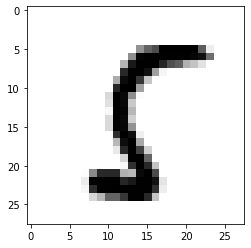

In [ ]:
#предсказание по тренировочной выборке
n = random.randint(1, 10000)
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print('это:',np.argmax(res))
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [ ]:
from google.colab import files #импорт фото 

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 1.jpg to 1.jpg
User uploaded file "1.jpg" with length 15151 bytes


In [ ]:
image_path = '/content/tsifra_9_larvij_bolshaya_tsvet_chyorniy_1_pic.jpg' #путь фото в системе

# изменили размер под количество входных нейронов
img = Image.open(image_path)
new_image = img.resize((28, 28))
new_image.show()
new_image.save(image_path)
# rgb преобразовали в gray
img = Image.open(image_path).convert('L')
img.save(image_path)

In [ ]:
img = Image.open(image_path) # преобразовали в массив
ar = np.asarray(img, dtype='uint8')


(28, 28)


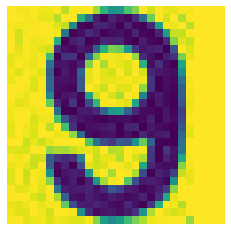

In [ ]:
print(ar.shape)
plt.imshow(ar)
plt.axis("off")
plt.show()

это: 5


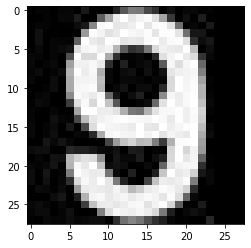

In [ ]:
#предсказание своего фото
x = np.expand_dims(ar, axis=0)
res = model.predict(x)
print('это:',np.argmax(res))
plt.imshow(ar, cmap=plt.cm.binary)
plt.show()